<a href="https://colab.research.google.com/github/agaonam/public_projects/blob/main/Business_Case_Part_2_Analysis_of_a_collection_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 2 – Collections Strategy Analysis  
**Business Case:** Evaluating a Contact-Based Recovery Campaign  
**Objective:** Estimate financial impact and recovery performance of targeting delinquent Contigo A customers using phone calls.  



In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Load contactability scores
file_path = '/BA Hiring - Collections Challenge.xlsx'
df_contact = pd.read_excel(file_path, sheet_name='Contactibility')

# Preview data
df_contact.head()

,customer_id,contactability_score
0,1,0.293
1,2,0.250
2,3,0.033
3,4,0.239
4,5,0.681


In [46]:
# Constants

loan_amount = 1000                # pesos
interest_rate = 0.15              # 15% interest on loan
repayment_if_contacted = 0.75     # 75% chance to repay if contacted
contact_cost = 30                 # cost per customer contacted
total_dq_customers = 675          # delinquent customers targeted

In [47]:
# Step 1: Calculate individual recovery probabilities
df_contact['recovery_probability'] = df_contact['contactability_score'] * repayment_if_contacted

# Step 2: Summarize expected results
expected_recovered_accounts = df_contact['recovery_probability'].sum()
recovered_total_debt = expected_recovered_accounts * loan_amount
interest_revenue = recovered_total_debt * interest_rate
total_campaign_cost = total_dq_customers * contact_cost
unrecovered_dq_losses = (total_dq_customers - expected_recovered_accounts) * loan_amount
collections_income = interest_revenue - total_campaign_cost

# Step 3: Summarize in DataFrame
summary_df = pd.DataFrame({
    'Metric': [
        'Expected Recovered Accounts',
        'Recovered Total Debt',
        'Interest Revenue',
        'Total Campaign Cost',
        'Unrecovered DQ Losses',
        'Collections Net Income'
    ],
    'Value': [
        round(expected_recovered_accounts, 2),
        round(recovered_total_debt, 2),
        round(interest_revenue, 2),
        round(total_campaign_cost, 2),
        round(unrecovered_dq_losses, 2),
        round(collections_income, 2)
    ]
})

summary_df

,Metric,Value
0,Expected Recovered Accounts,212.02
1,Recovered Total Debt,212024.25
2,Interest Revenue,31803.64
3,Total Campaign Cost,20250.00
4,Unrecovered DQ Losses,462975.75
5,Collections Net Income,11553.64


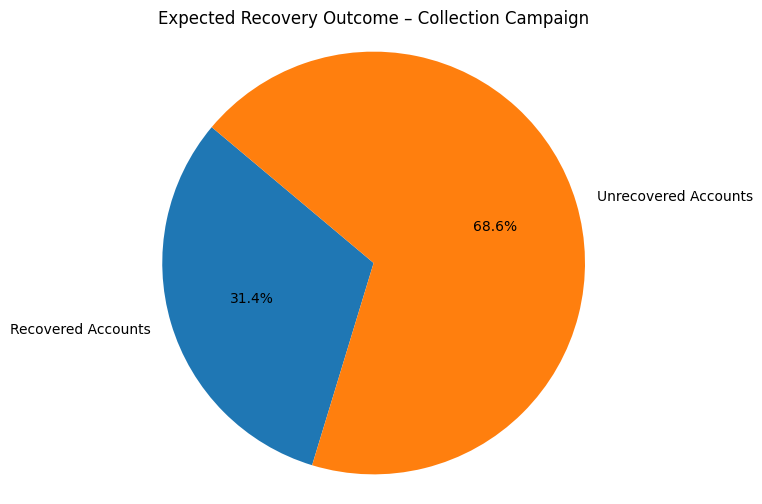

In [48]:
labels = ['Recovered Accounts', 'Unrecovered Accounts']
sizes = [expected_recovered_accounts, total_dq_customers - expected_recovered_accounts]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Expected Recovery Outcome – Collection Campaign')
plt.axis('equal')
plt.show()

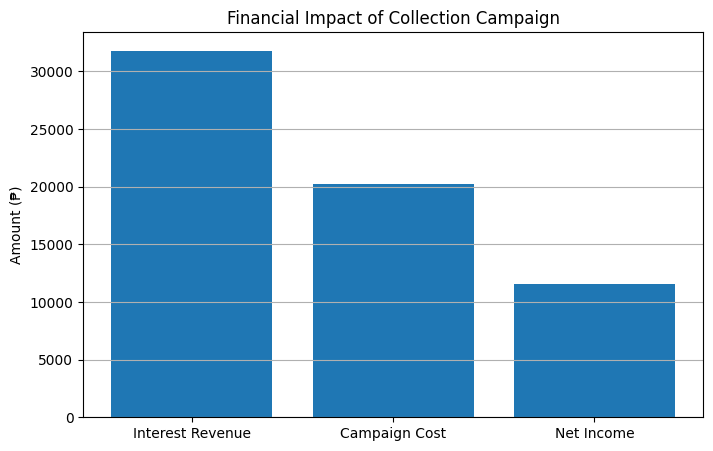

In [49]:
labels = ['Interest Revenue', 'Campaign Cost', 'Net Income']
values = [interest_revenue, total_campaign_cost, collections_income]

plt.figure(figsize=(8,5))
plt.bar(labels, values)
plt.title('Financial Impact of Collection Campaign')
plt.ylabel('Amount (₱)')
plt.grid(axis='y')
plt.show()


Q1. Collection Campaign KPI Estimates

Based on the simulation for all 675 delinquent Contigo A customers, using contactability scores and repayment assumptions, here is the estimated outcome of launching the phone campaign:

1. Recovered Accounts:
We expect to recover approximately 212 accounts. This is based on the probability of successfully contacting a customer (contactability_score) and the probability of repayment if contacted (75%). This surpasses the 175 account recovery goal set by the credit department.

2. Recovered Total Debt:
Since each recovered customer repays the full 1,000 loan principal, the total recovered debt is approximately:
212 accounts * 1,000 = 212,024

This is not direct revenue as it offsets lossess.

3. Revenue from Collected Interest:
Revenue is generated only from interest on performing loans. We apply the 15% interest rate to the total amount recovered:
212,024 * 0.15 = 31,804

Why is the loan principal not included in revenue?
Because it's money the company already lent out. Recovering it doesn't generate profit, it prevents further loss. Revenue only includes the new money earned (interest), not the return of capital.

4. Total Campaign Cost:
Each customer costs 30 pesos to contact. We're contacting all 675:
675 * 30 = 20,250

5. DQ Losses from Unrecovered Debt:
We expect that 463 customers will not repay (675 - 212). Each represents a loss of 1,000 in loan principal:
463 * 1,000 = 462,976

6. Collections Net Income:
We subtract total campaign costs from interest revenue to get net profit from the campaign:
31,804 - 20,250 = 11,554

**Conclusion:**
This campaign is financially positive, meeting the recovery goal and generating a net income of over 11,000 pesos.


# SQL Code Block – Collection Campaign KPIs
# Assuming the contactability scores are stored in a table called *contactability_scores*


-- SQL logic to compute the campaign performance KPIs

SELECT
  - ROUND(SUM(contactability_score * 0.75), 2) AS expected_recovered_accounts,
  - ROUND(SUM(contactability_score * 0.75) * 1000, 2) AS recovered_total_debt,
  - ROUND(SUM(contactability_score * 0.75) * 1000 * 0.15, 2) AS interest_revenue,
  - 675 * 30 AS total_campaign_cost,
  - ROUND((675 - SUM(contactability_score * 0.75)) * 1000, 2) AS unrecovered_dq_losses,
  R- OUND(SUM(contactability_score * 0.75) * 1000 * 0.15 - 675 * 30, 2) AS collections_income
- FROM contactability_scores;


Q2. Impact on Overall Business Performance

To assess the impact of the collection campaign, we compare the financials of Contigo A in Month 1 with and without the collection strategy.

Without Collection Campaign (provided baseline):
- Accounts: 5,000
- DQ Accounts: 675
- Interest Revenue: 648,750
- DQ Losses: 675,000
- Operating Cost: 150,000
- Net Income: -176,250 (loss)

With Collection Campaign:
We recover 212 accounts from delinquency, which:
- Reduces DQ losses by 212,000 (from 675,000 to 463,000)
- Generates 31,804 in additional interest revenue
- Adds 20,250 in operating costs from calls

Net income improves by:
= +31,804 (revenue)
= -20,250 (cost)
= +11,554 (net collections income)

New net income becomes:
-176,250 + 11,554 = -164,696

Impact Summary:
- Losses are reduced by 11,554
- The DQ rate drops from 13.5% to roughly 9.3%
- The segment crosses below the 10% DQ profitability threshold

**Conclusion:**
The campaign creates measurable financial improvement and makes the product viable by moving DQ below break-even. While it doesn’t eliminate losses entirely, it is a low-cost intervention with a high impact. Based on this result, the collection campaign should be applied, and improved measuring it's results.

Q3. Suggested Improvements to the Collection Campaign


While the campaign is effective, there are clear opportunities to optimize and increase its profitability further:


1. Target High-Contactability Customers Only:
   - Focus calling efforts on customers with a contactability score above a certain threshold (e.g. 0.6 or 0.7).
   - This would reduce campaign cost while preserving most of the expected recoveries.
   - Example: If 60% of customers generate 90% of recoveries, we can eliminate 40% of call costs with minimal revenue loss.

2. Introduce Tiered Outreach Strategy:
   - Use a blended communication model:
     - High-score customers: phone calls (expensive but effective)
     - Low-score customers: SMS, email, or WhatsApp (cheaper, low engagement)
   - This reduces cost per attempt while still applying pressure across the full DQ base.

3. Score-Based Resource Allocation:
   - Assign more experienced agents to high-value or high-likelihood accounts.
   - This could boost the success rate even within the same contactability bracket.

4. A/B Test Timing & Message Design:
   - Vary the time-of-day, script, and tone of calls.
   - Log and analyze which segments respond better to what type of message.
   - Optimize outreach design continuously with data.

5. Close the Feedback Loop with Risk Models:
   - Feed repayment data back to the credit scoring and contactability models.
   - Improves targeting over time and strengthens decision intelligence.

6. Test Alternative Incentives:
   - Offer partial forgiveness or incentives (e.g. waive interest if paid in 3 days) to boost repayment rates.
   - Evaluate cost-benefit versus expected net recovery.

**Conclusion:**
The existing campaign is already impactful, but iterate based on its results would create a more data-driven and segmented approach, which could direclty and significantly improve ROI. The main key is to prioritize high-likelihood accounts, cut waste, and optimize operational effort.